In [1]:
import os
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
sys.path.append(src_path)
import preprocessing
import model

In [3]:
df_merged, label_encoder_package_type, label_encoder_country = (
    preprocessing.pre_processing()
)

c:\Users\92335\Desktop\Studies\semester3\data_science\Project\Data\Data_Science_Project_Group_5\src\preprocessing.py:181: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["PACKAGE_DENSITY"].fillna(mean_package_density, inplace=True)
c:\Users\92335\Desktop\Studies\semester3\data_science\Project\Data\Data_Science_Project_Group_5\src\preprocessing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [4]:
df_merged.describe()

,SPECIAL_TRIP,COUNTRY,PRIORITY,PACKAGE_TYPE,PACKAGE_DENSITY,month_of_arrival,day_of_arrival,hour_of_arrival,TOTAL_TIME_TAKEN
count,21530.000000,21530.000000,21530.000000,21530.000000,21530.000000,21530.000000,21530.000000,21530.000000,21530.000000
mean,0.077798,7.321876,1.400372,1.390386,188.670756,6.470042,16.177195,10.702508,82.066532
std,0.267860,2.811522,0.772838,0.934817,119.110852,3.437215,8.438791,6.305246,56.223429
min,0.000000,0.000000,1.000000,0.000000,0.159091,1.000000,1.000000,0.000000,0.116667
25%,0.000000,7.000000,1.000000,1.000000,101.010101,3.000000,9.000000,6.000000,30.881667
50%,0.000000,7.000000,1.000000,1.000000,155.351593,7.000000,16.000000,9.000000,74.205694
75%,0.000000,7.000000,1.000000,1.000000,247.023810,9.000000,24.000000,17.000000,123.937500
max,1.000000,25.000000,3.000000,4.000000,561.594203,12.000000,31.000000,23.000000,274.258056


In [5]:
df_merged.isna().sum()

SPECIAL_TRIP        0
COUNTRY             0
PRIORITY            0
PACKAGE_TYPE        0
PACKAGE_DENSITY     0
month_of_arrival    0
day_of_arrival      0
hour_of_arrival     0
TOTAL_TIME_TAKEN    0
dtype: int64

       SPECIAL_TRIP       COUNTRY      PRIORITY  PACKAGE_TYPE  \
count  21530.000000  21530.000000  21530.000000  21530.000000   
mean       0.077798      7.321876      1.400372      1.390386   
std        0.267860      2.811522      0.772838      0.934817   
min        0.000000      0.000000      1.000000      0.000000   
25%        0.000000      7.000000      1.000000      1.000000   
50%        0.000000      7.000000      1.000000      1.000000   
75%        0.000000      7.000000      1.000000      1.000000   
max        1.000000     25.000000      3.000000      4.000000   

       PACKAGE_DENSITY  month_of_arrival  day_of_arrival  hour_of_arrival  \
count     21530.000000      21530.000000    21530.000000     21530.000000   
mean        188.670756          6.470042       16.177195        10.702508   
std         119.110852          3.437215        8.438791         6.305246   
min           0.159091          1.000000        1.000000         0.000000   
25%         101.010101       

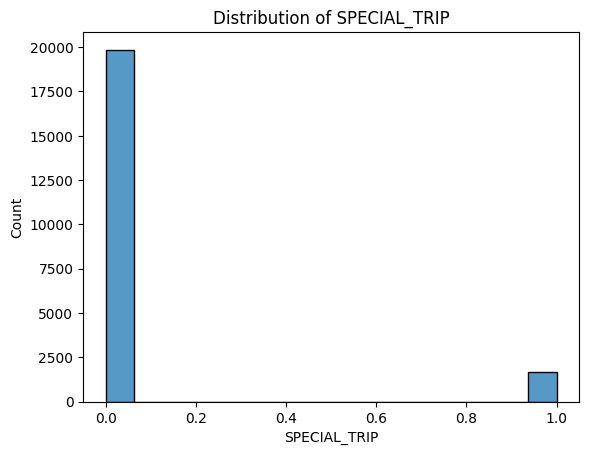

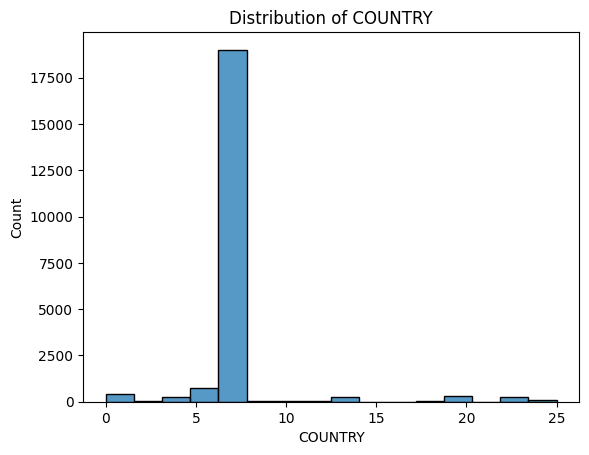

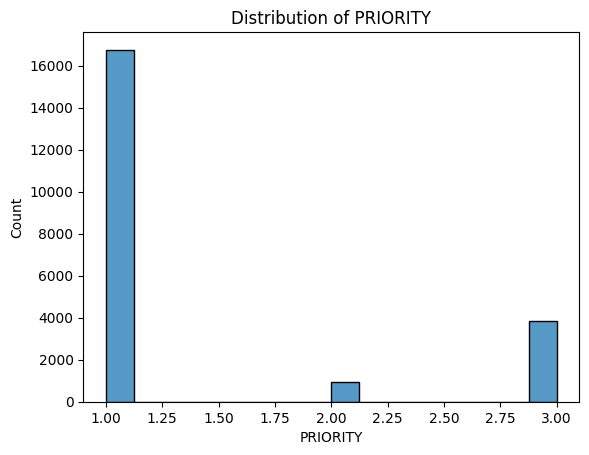

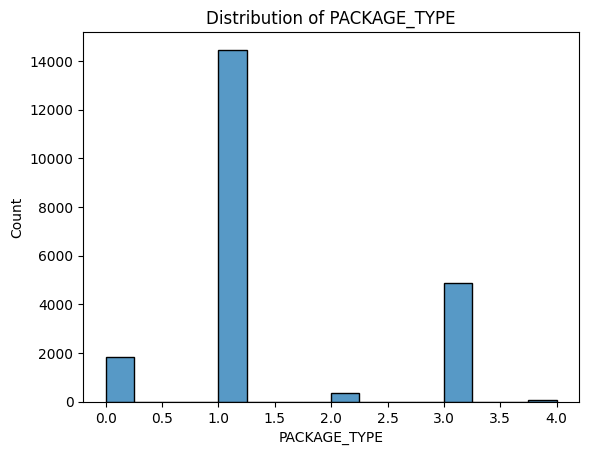

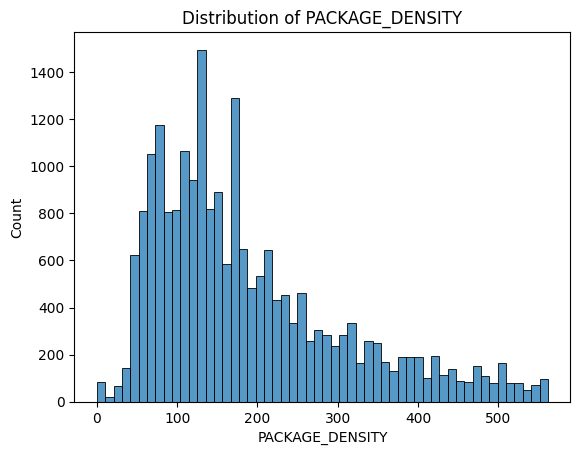

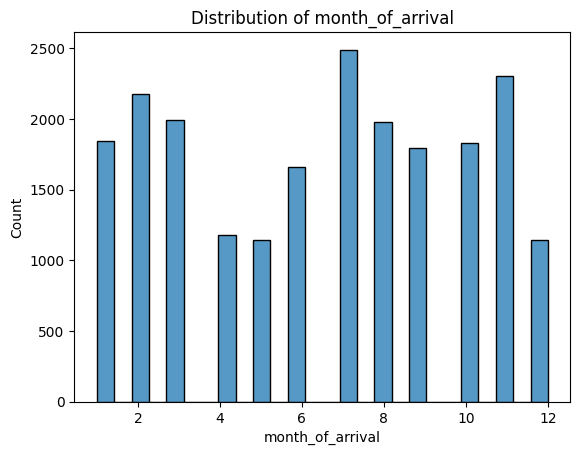

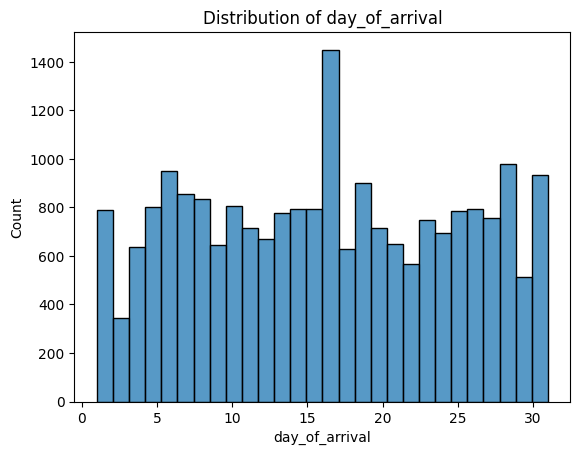

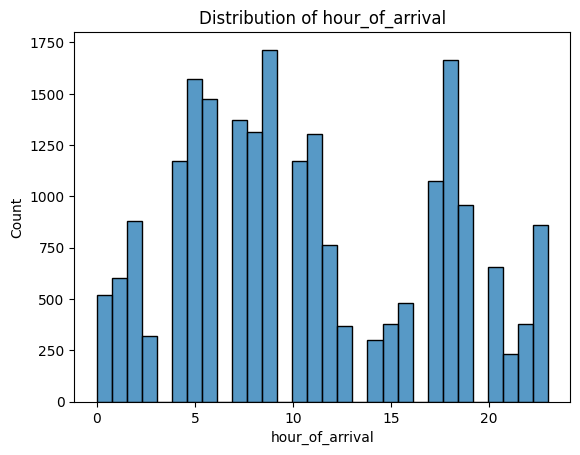

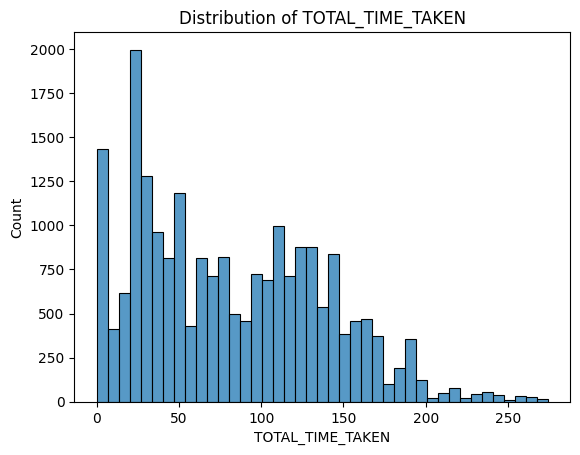

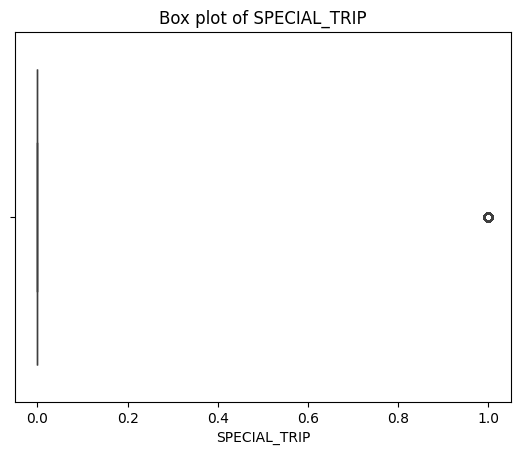

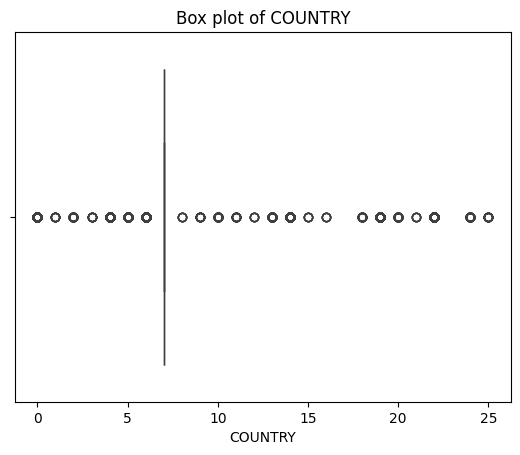

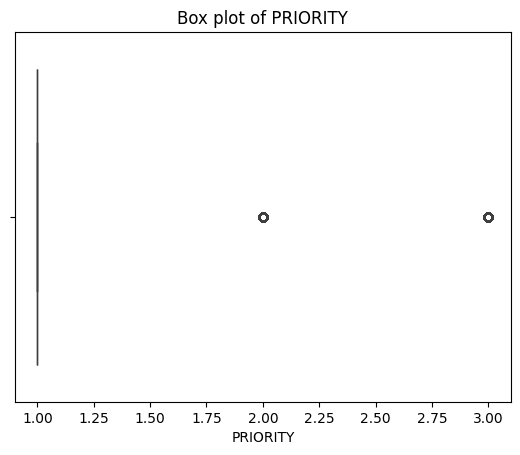

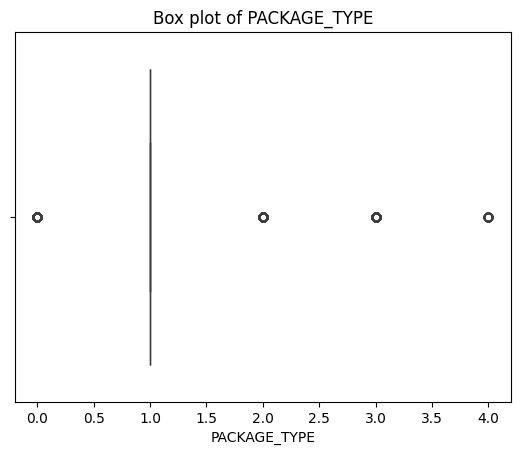

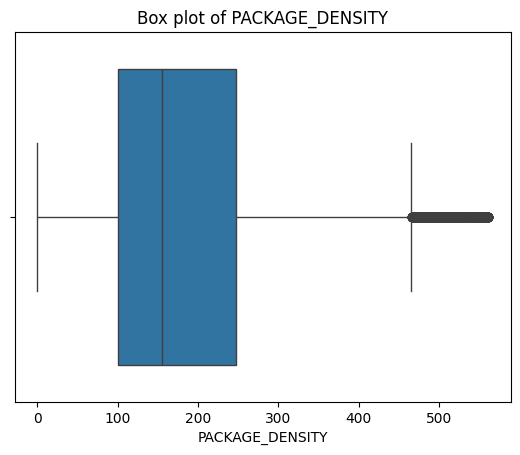

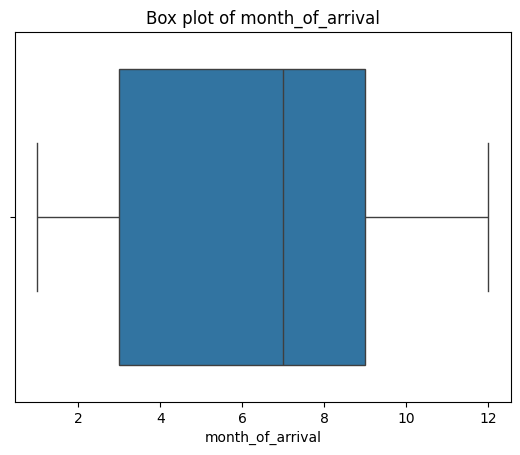

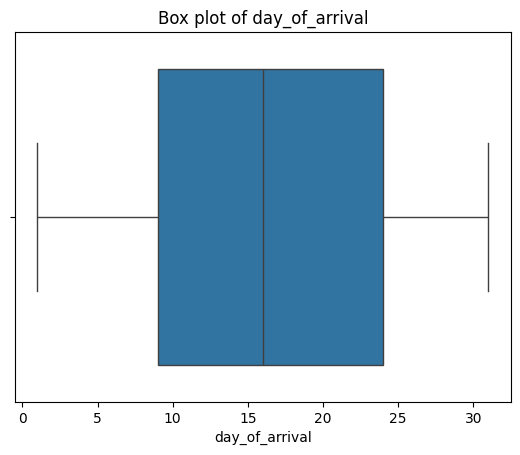

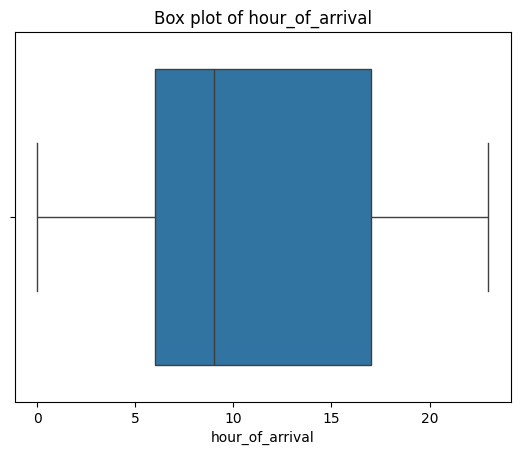

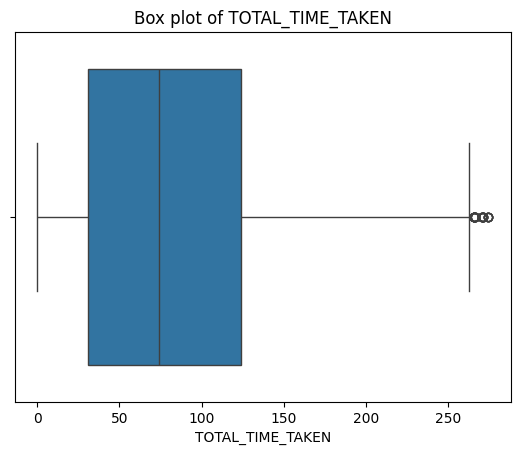

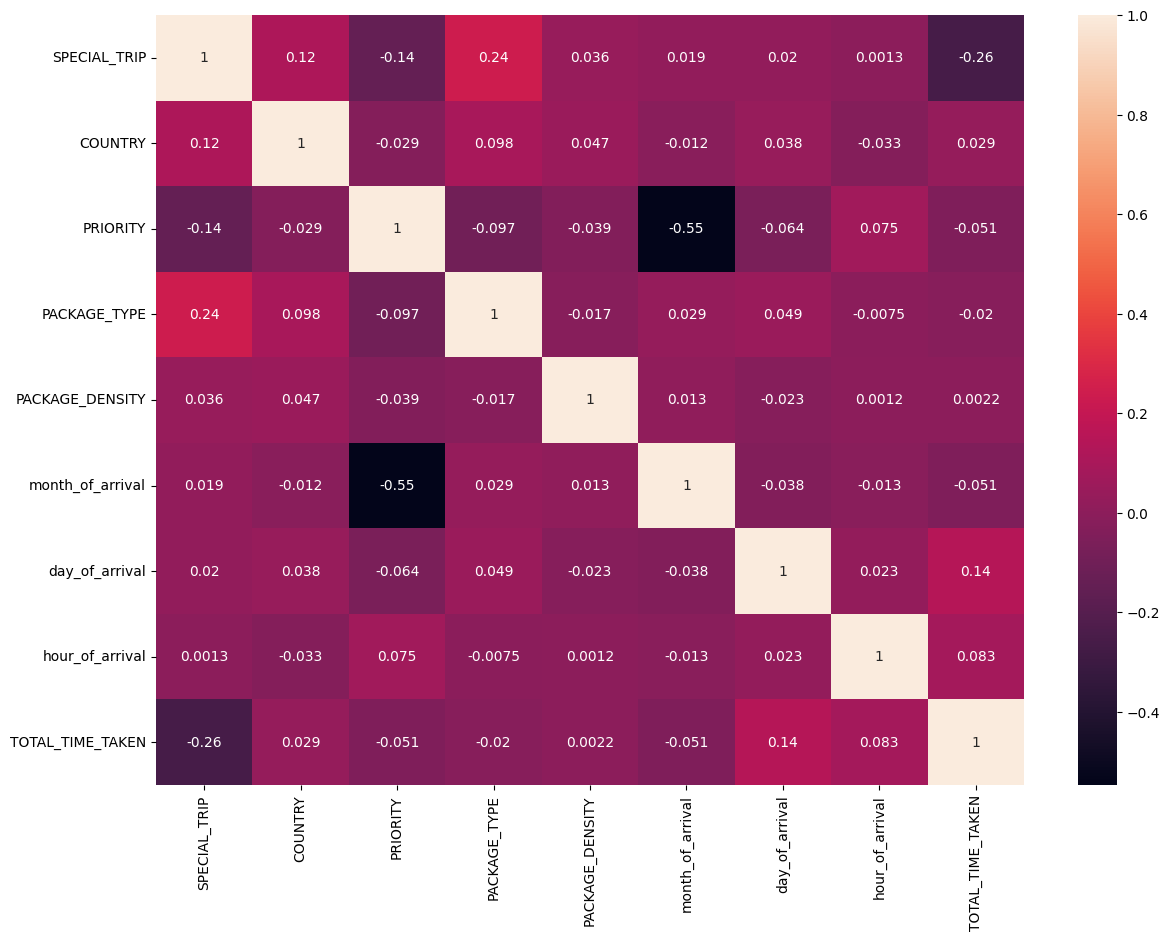

In [6]:
print(df_merged.describe())


for col in df_merged.columns:
    sns.histplot(df_merged[col])
    plt.title(f"Distribution of {col}")
    plt.show()

# Box plots for numerical columns
for col in df_merged.columns:
    sns.boxplot(x=df_merged[col])
    plt.title(f"Box plot of {col}")
    plt.show()


# Correlation matrix
plt.figure(figsize=(14, 10))
corr_matrix = df_merged.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
mean_Data = pd.read_excel("../data/mean_processing_time.xlsx")

c:\Users\92335\Desktop\Studies\semester3\data_science\Project\Data\Data_Science_Project_Group_5\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Ridge
MSE: 2851.5310099220783
MAE: 44.978588890445785
R²: 0.10551023172913898


Model: Lasso
MSE: 2852.785445693139
MAE: 45.16972187033345
R²: 0.10511673084899342


Model: Decision Tree
MSE: 20.215386340224907
MAE: 0.48370781942610974
R²: 0.9936586850432085


Model: Random Forest
MSE: 33.31368172172589
MAE: 1.6467731391247982
R²: 0.9895499128924675


Model: Gradient Boosting
MSE: 1589.9804664130654
MAE: 31.690431530021485
R²: 0.5012429273929297


Model: SVR
MSE: 2510.5978903101204
MAE: 39.685044069386066
R²: 0.2124567057798965


Model: MLP
MSE: 2188.774927158167
MAE: 38.25511384350229
R²: 0.3134085617240825




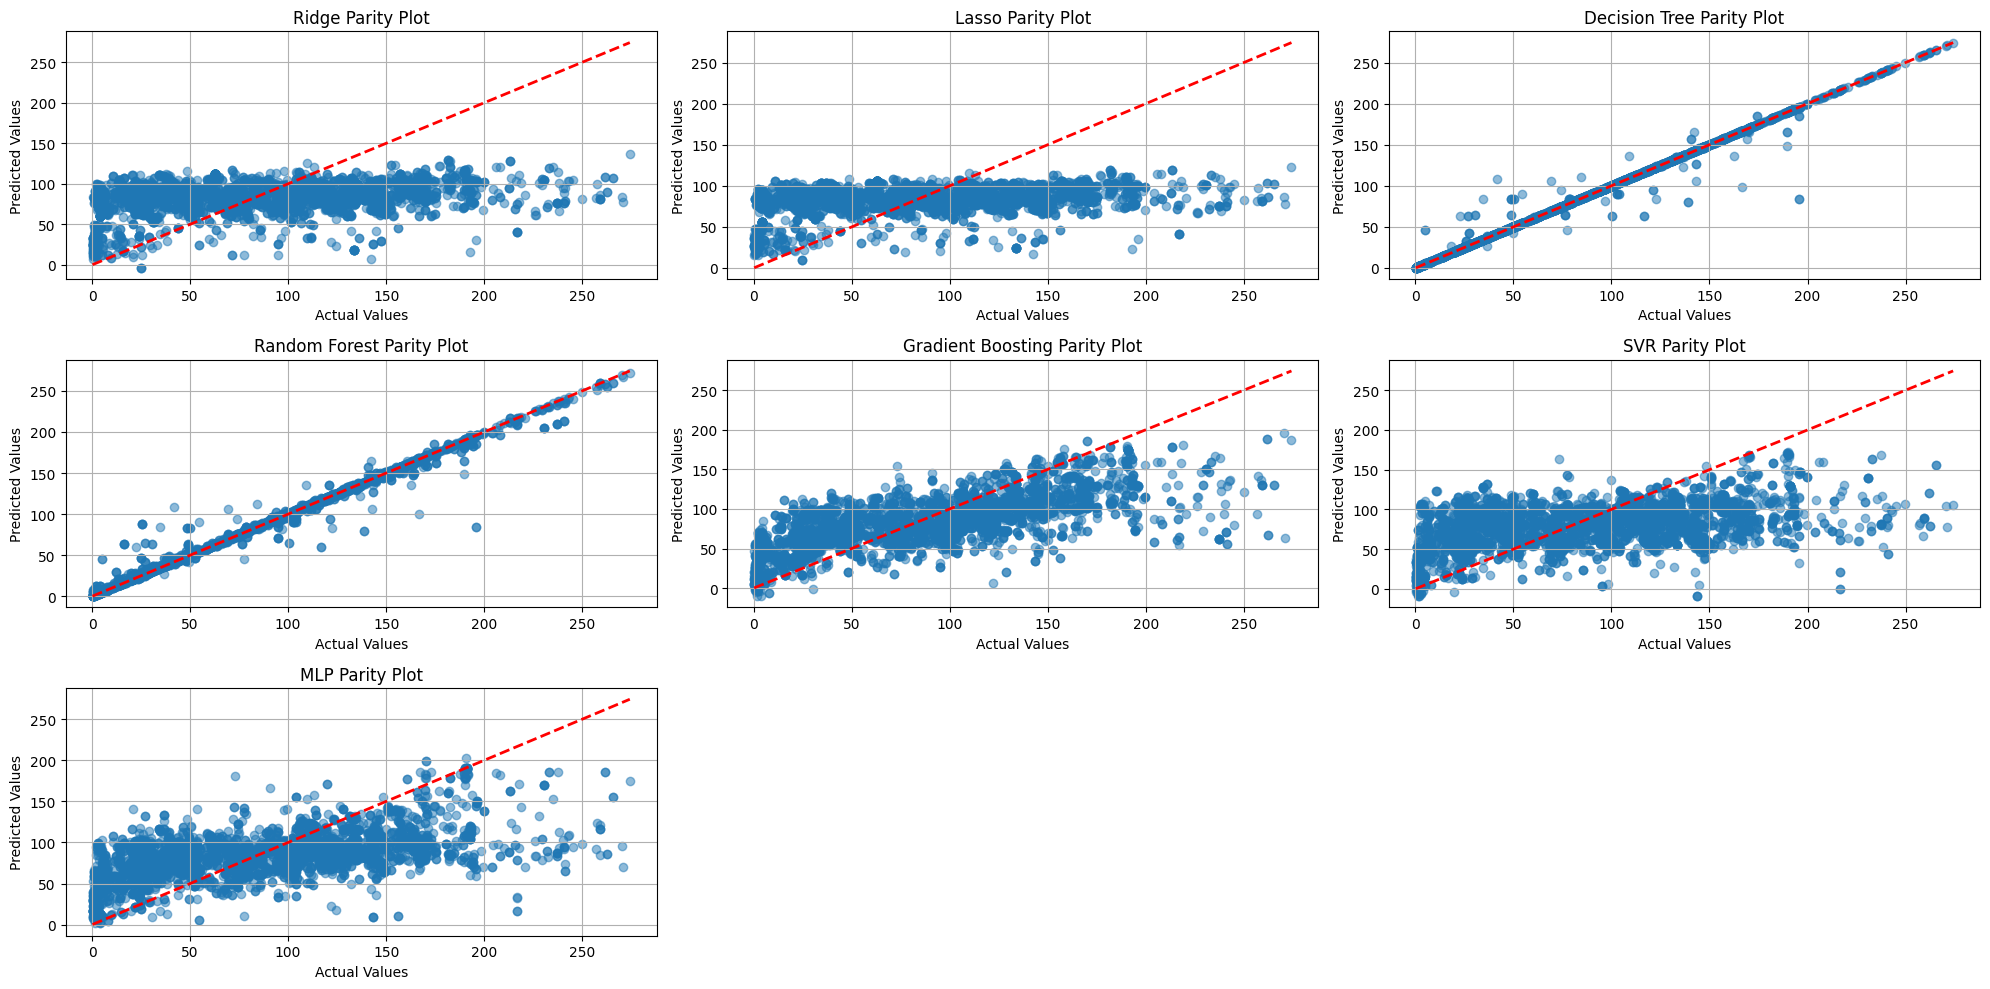

--------- best model from these is Decision Tree --------
Model: Decision Tree
MSE: 20.215386340224907
MAE: 0.48370781942610974
R²: 0.9936586850432085




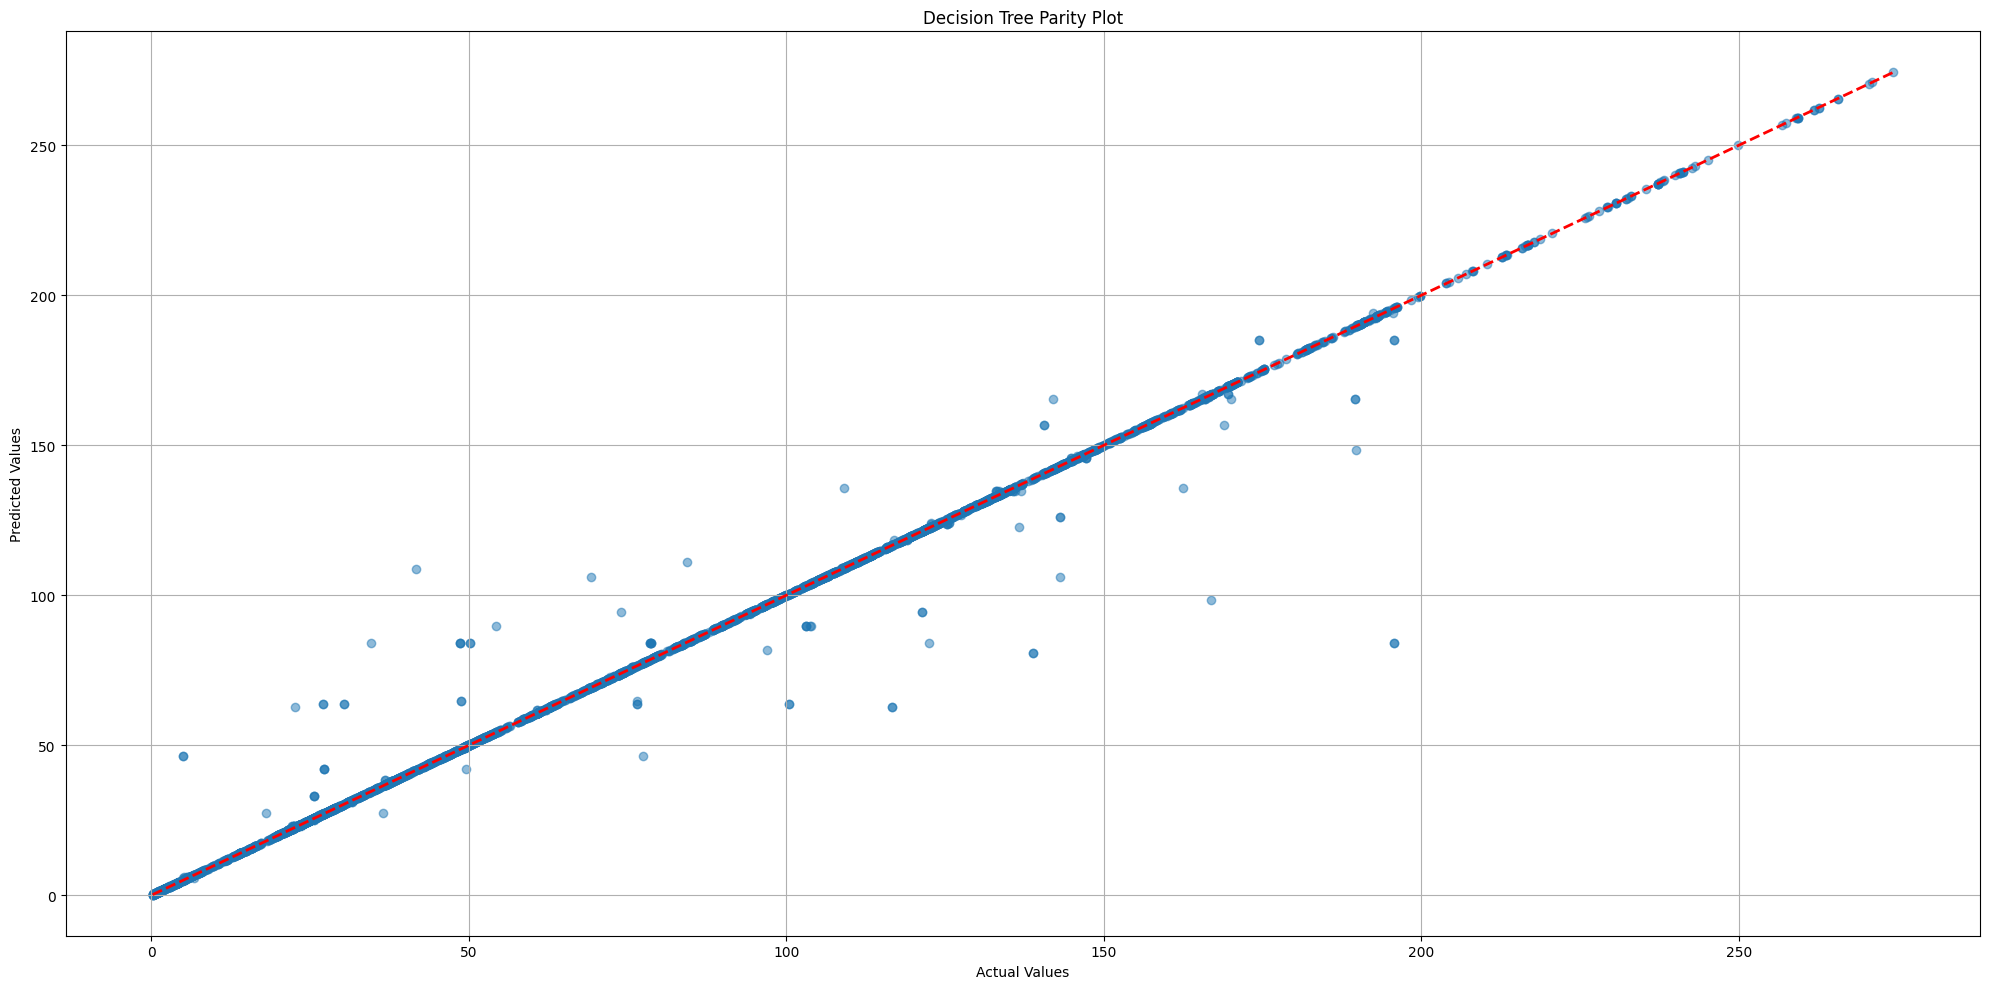

In [8]:
final_results = model.model_results(
    df_merged, mean_Data, label_encoder_package_type, label_encoder_country
)

In [9]:
final_results

,SPECIAL_TRIP,COUNTRY,PRIORITY,PACKAGE_TYPE,PACKAGE_DENSITY,month_of_arrival,day_of_arrival,hour_of_arrival,predictions,actual
0,0,DE,1,CAR,"333,33",6,23,9,"72,01","72,02"
1,0,DE,3,CAR,"78,12",2,14,20,"110,43","110,43"
2,0,DE,1,PAL,"79,33",11,9,17,"109,47","109,47"
3,1,DE,1,PAL,"133,93",2,23,13,"0,78","0,78"
4,0,CZ,1,PAL,"333,33",5,23,5,"167,15","167,15"
...,...,...,...,...,...,...,...,...,...,...
4301,0,CZ,3,PAL,"378,79",2,2,17,"232,19","232,19"
4302,0,DE,1,CAR,"132,76",12,8,7,"121,75","121,75"
4303,0,DE,3,CAR,"106,06",3,7,1,"29,79","29,79"
4304,0,DE,1,CAR,"232,92",7,20,17,"133,22","133,22"
